In [6]:
import pandas as pd


y_path = "./y.csv"
y = pd.read_csv(y_path, index_col=["backbone", "pyridone"])
display(y)


beta_av
backbone pyridone           
0        0         51.388357
         1         63.841924
         2         59.085161
         3         53.059721
         4         53.917807
...                      ...
20       8         19.228094
         9         24.595903
         10        21.060263
         11        19.203989
         12        23.601443

[104 rows x 1 columns]

In [19]:
from sklearn.model_selection import LeaveOneGroupOut


logo = LeaveOneGroupOut()
groups = y.index.get_level_values("pyridone")

dfs = []

for _, index_test in logo.split(y, groups=groups):
    df = y.iloc[index_test]
    column = df.index.get_level_values("pyridone")[0]
    df = df.rename(columns={"beta_av": column})
    #df = df.reset_index("pyridone", drop=True)
    df = df.reset_index(drop=True)
    dfs.append(df)
    
yield_df = pd.concat(dfs, axis=1)
display(yield_df)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,51.388357,63.841924,59.085161,53.059721,53.917807,56.153319,50.969403,51.655351,48.798774,50.342873,47.894528,47.205211,46.286168
1,51.539999,64.041771,56.625391,51.200555,54.038835,54.044189,49.023217,49.860733,47.966785,49.085003,46.084394,44.962260,46.020327
2,47.832328,63.155406,58.624277,50.955722,50.321093,53.047256,50.474366,47.727759,45.182829,45.243690,42.843225,42.356297,45.612098
3,47.845209,70.080418,62.904552,55.457276,50.608890,55.810950,51.602399,47.800828,39.745520,42.315060,41.484904,38.075560,46.114252
4,43.960253,65.421028,60.001959,56.672440,48.821888,57.136955,52.589578,46.297638,42.388401,42.981152,42.519636,39.133657,49.747110
5,53.653941,65.839352,59.588924,59.621349,55.933165,54.126938,53.196183,52.763604,55.189066,54.225982,54.513381,53.361149,48.959898
6,49.506825,64.736624,61.648018,54.383662,54.143679,55.091201,51.117783,46.249826,32.852357,39.645974,40.710818,33.010984,41.066778
7,17.008060,19.971890,29.540207,49.963688,27.611356,24.408821,17.804581,17.219599,19.228094,24.595903,21.060263,19.203989,23.601443


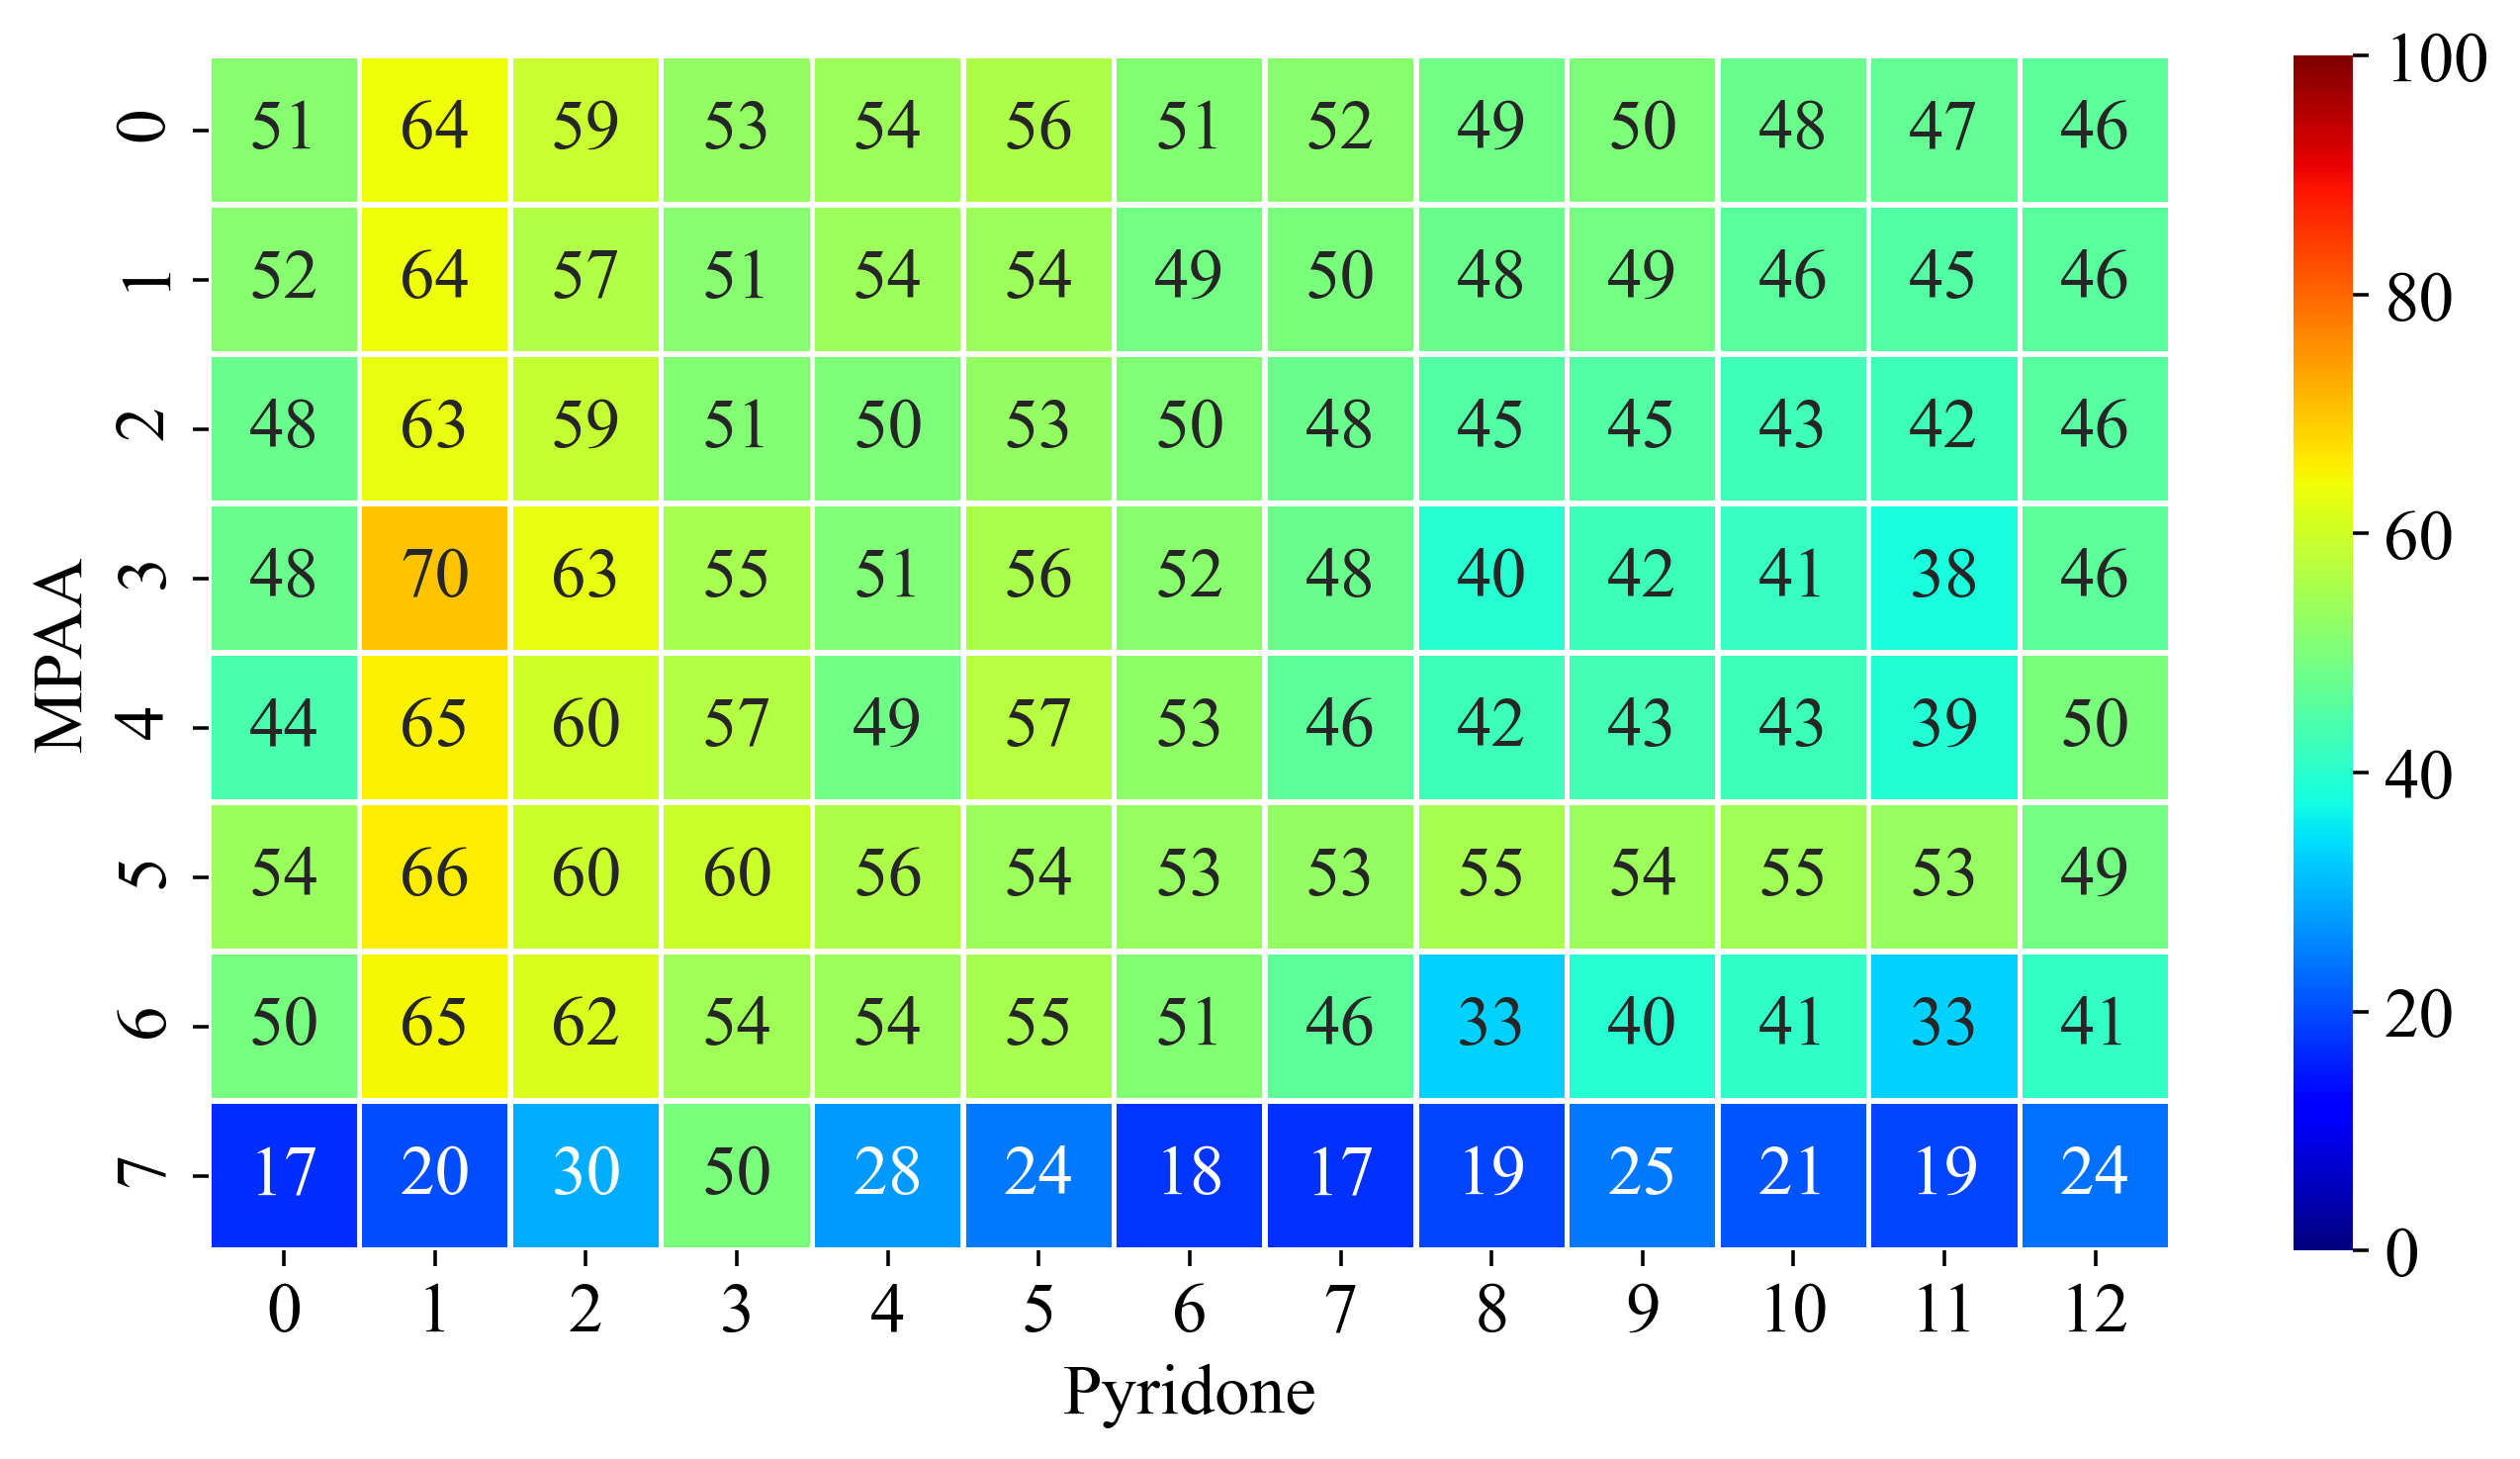

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams["figure.dpi"] = 320
plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "Times New Roman"

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(yield_df, ax=ax, vmax=100, vmin=0, center=50, annot=True, cmap="jet", fmt="1.0f", linewidth=1.0)
#ax.set_title("Experimental yield (%)")
ax.set_xlabel("Pyridone")
ax.set_ylabel("MPAA")
plt.savefig("./yield.png")
plt.show()
